In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("normalize.csv")

In [3]:
X = df[['area (acre)', 'wind speed', 'profile soil moisture', 'rootzone soil wetness', 'All Sky Surface Shortwave Diffuse Irradiance', 'no of open well', 'no of bore wells', 'canal length', 'no of ponds', 'Factamfos', 'Potash', 'Urea']]

In [4]:
y = df[['yield (kg/acre)']]

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

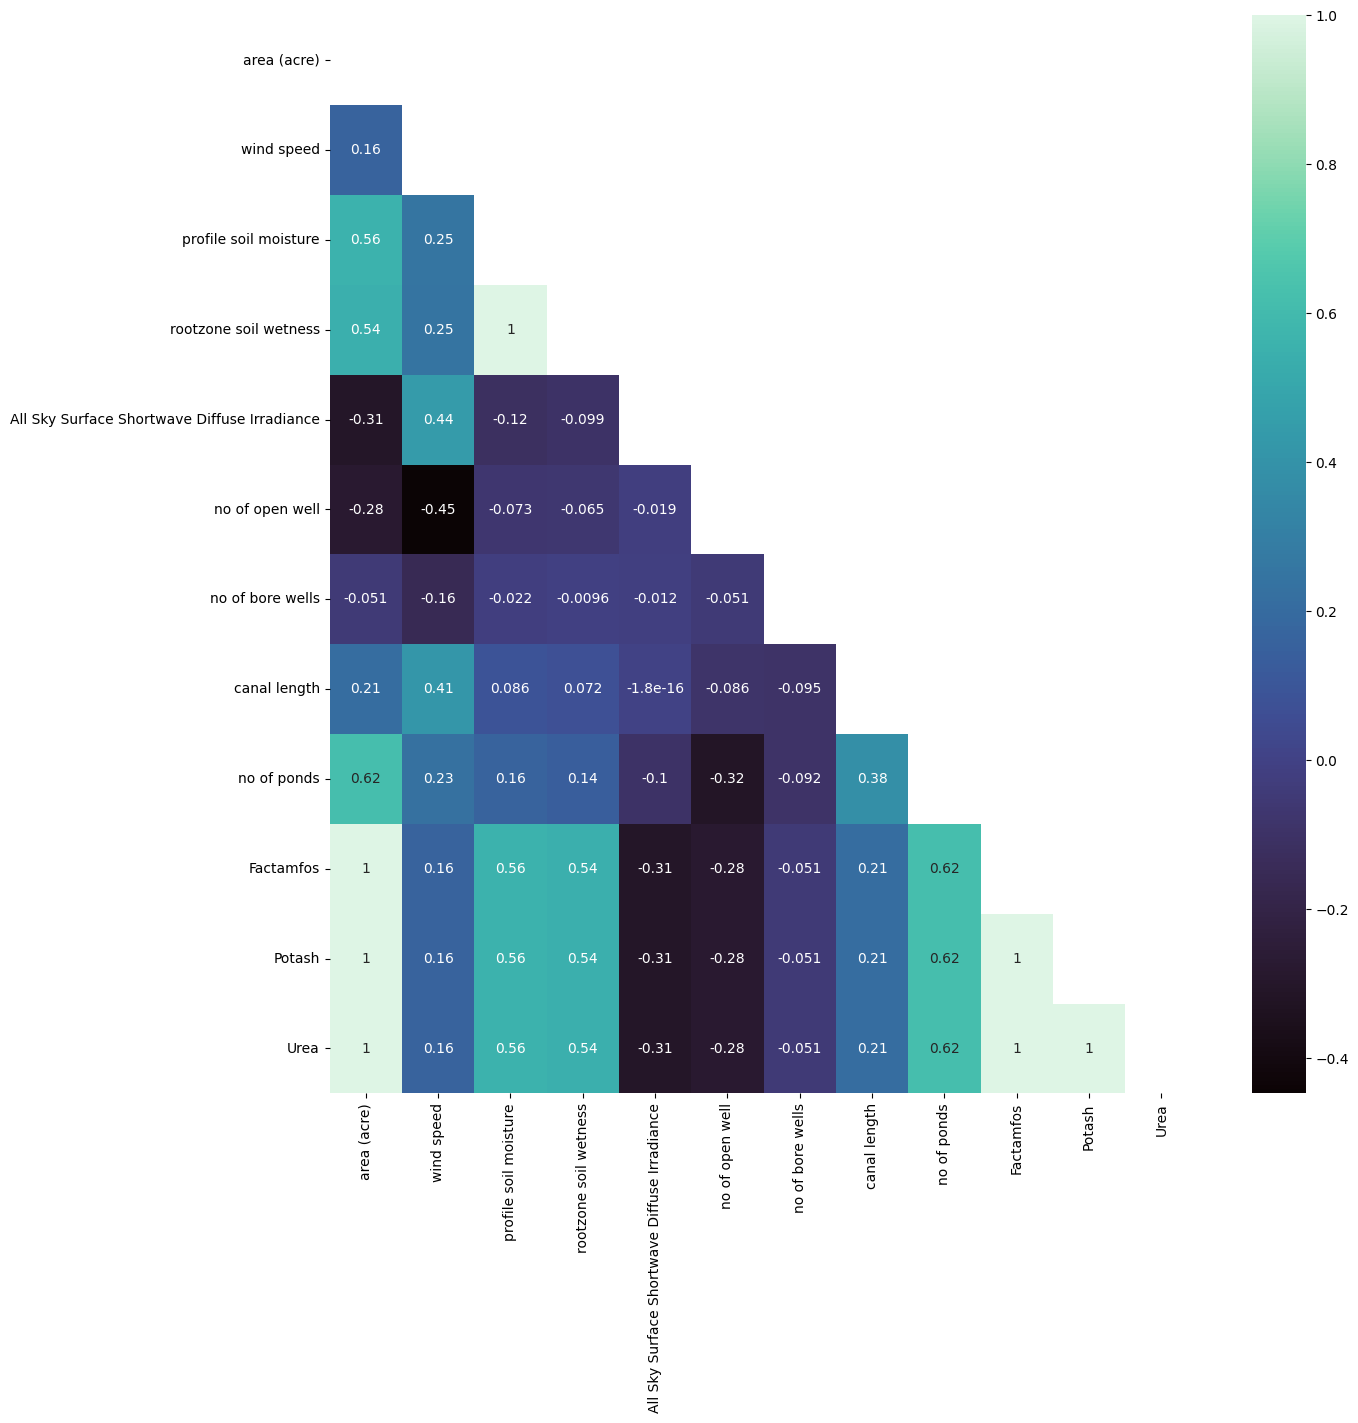

In [7]:
plt.figure(figsize=(14,14))
corr= X.corr()
sns.heatmap(corr,annot=True,cmap='mako',mask=np.triu(corr))
plt.show()

In [9]:
colum = X.columns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
ADB = AdaBoostRegressor(random_state=42, n_estimators=500)

In [9]:
ADB.fit(X_train, y_train)

C:\Users\omika\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(n_estimators=500, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [11]:
pred_ab = ADB.predict(X_test)
pred_ab1 = ADB.predict(X_train)

In [12]:
mse_ADB = mean_squared_error(y_test, pred_ab)
mae_ADB = mean_absolute_error(y_test, pred_ab)
print('Mean squared error using XGB: ', mse_ADB)
print('Mean absolute error Using XGB: ', mae_ADB)
r_squared = r2_score(y_test, pred_ab)
print("R-squared:", r_squared)

Mean squared error using XGB:  48207.85759979397
Mean absolute error Using XGB:  166.71513135193587
R-squared: 0.790753513177717


In [13]:
import pickle

In [14]:
with open('adaboost_regression.pkl', 'wb') as f:
    pickle.dump(ADB, f)